In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter


In [2]:
# Load the data
file_path = Path('happiness_joined.csv')
happiness_joined_df = pd.read_csv(file_path,encoding="ISO-8859-1")#,index_col=0)
# happiness_joined_df = df.loc[:, columns].copy()

# df.reset_index(inplace=True, drop=True)

happiness_joined_df.head()


,country_code,country_name,democracy_index,consumer_price_index,gender_ratio_males_per100_female,infant_mortality_per1000_births,life_expectancy,per_capita_gdp_dollars,population_density,safe_drinking_water_access_pct,seats_held_by_women_pct,unemployment_rate,life_ladder
0,8,Albania,58.9,119.1,103.7,8.0,78.4,"$5,303.00",105.1,70.7,29.3,12.8,5.00
1,12,Algeria,40.1,151.4,102.1,21.2,76.6,"$3,976.00",18.1,72.4,25.8,11.5,4.75
2,51,Armenia,55.4,129.2,88.8,10.8,74.9,"$4,623.00",103.9,86.9,24.2,16.6,5.49
3,40,Austria,82.9,118.1,97.0,3.2,81.4,"$49,701.00",108.7,98.9,37.2,4.8,7.20
4,31,Azerbaijan,27.5,156.9,99.7,20.8,72.8,"$4,782.00",121.6,88.3,16.8,6.0,5.17


In [3]:
happiness_joined_df[['country_code','democracy_index','consumer_price_index','gender_ratio_males_per100_female','infant_mortality_per1000_births','life_expectancy','per_capita_gdp_dollars','population_density','safe_drinking_water_access_pct','seats_held_by_women_pct','unemployment_rate']] = happiness_joined_df[['country_code','democracy_index','consumer_price_index','gender_ratio_males_per100_female','infant_mortality_per1000_births','life_expectancy','per_capita_gdp_dollars','population_density','safe_drinking_water_access_pct','seats_held_by_women_pct','unemployment_rate']].replace({'\$': '', ',': ''}, regex=True).astype(float)
#
happiness_joined_df.head()
# # REF: https://pbpython.com/currency-cleanup.html

,country_code,country_name,democracy_index,consumer_price_index,gender_ratio_males_per100_female,infant_mortality_per1000_births,life_expectancy,per_capita_gdp_dollars,population_density,safe_drinking_water_access_pct,seats_held_by_women_pct,unemployment_rate,life_ladder
0,8.0,Albania,58.9,119.1,103.7,8.0,78.4,5303.0,105.1,70.7,29.3,12.8,5.00
1,12.0,Algeria,40.1,151.4,102.1,21.2,76.6,3976.0,18.1,72.4,25.8,11.5,4.75
2,51.0,Armenia,55.4,129.2,88.8,10.8,74.9,4623.0,103.9,86.9,24.2,16.6,5.49
3,40.0,Austria,82.9,118.1,97.0,3.2,81.4,49701.0,108.7,98.9,37.2,4.8,7.20
4,31.0,Azerbaijan,27.5,156.9,99.7,20.8,72.8,4782.0,121.6,88.3,16.8,6.0,5.17


In [4]:
# data types
happiness_joined_df.dtypes

country_code                        float64
country_name                         object
democracy_index                     float64
consumer_price_index                float64
gender_ratio_males_per100_female    float64
infant_mortality_per1000_births     float64
life_expectancy                     float64
per_capita_gdp_dollars              float64
population_density                  float64
safe_drinking_water_access_pct      float64
seats_held_by_women_pct             float64
unemployment_rate                   float64
life_ladder                         float64
dtype: object

In [5]:
# What data is missing?
# find null values
for column in happiness_joined_df.columns:
    print(f"Column{column} has {happiness_joined_df[column].isnull().sum()} null values")

Columncountry_code has 0 null values
Columncountry_name has 0 null values
Columndemocracy_index has 0 null values
Columnconsumer_price_index has 0 null values
Columngender_ratio_males_per100_female has 0 null values
Columninfant_mortality_per1000_births has 0 null values
Columnlife_expectancy has 0 null values
Columnper_capita_gdp_dollars has 0 null values
Columnpopulation_density has 0 null values
Columnsafe_drinking_water_access_pct has 0 null values
Columnseats_held_by_women_pct has 0 null values
Columnunemployment_rate has 0 null values
Columnlife_ladder has 0 null values


In [6]:
# What data is missing?
# find null values
for column in happiness_joined_df.columns:
    print(f"Column{column} has {happiness_joined_df[column].nunique()} uniques values")

Columncountry_code has 91 uniques values
Columncountry_name has 91 uniques values
Columndemocracy_index has 83 uniques values
Columnconsumer_price_index has 89 uniques values
Columngender_ratio_males_per100_female has 68 uniques values
Columninfant_mortality_per1000_births has 75 uniques values
Columnlife_expectancy has 73 uniques values
Columnper_capita_gdp_dollars has 91 uniques values
Columnpopulation_density has 89 uniques values
Columnsafe_drinking_water_access_pct has 73 uniques values
Columnseats_held_by_women_pct has 80 uniques values
Columnunemployment_rate has 66 uniques values
Columnlife_ladder has 81 uniques values


In [7]:
# to check for duplicates
print(f"Duplicate entries: {happiness_joined_df.duplicated().sum()}")

Duplicate entries: 0


## Splitting the Dataset into the Independent Feature Matrix:

In [8]:
happiness_joined_df.columns.values.tolist()

['country_code',
 'country_name',
 'democracy_index',
 'consumer_price_index',
 'gender_ratio_males_per100_female',
 'infant_mortality_per1000_births',
 'life_expectancy',
 'per_capita_gdp_dollars',
 'population_density',
 'safe_drinking_water_access_pct',
 'seats_held_by_women_pct',
 'unemployment_rate',
 'life_ladder']

In [9]:
print(happiness_joined_df.shape)

(91, 13)


## Modeling -- linear regression

In [10]:
# select features 
#X = happiness_joined_df[['democracy_index','consumer_price_index','gender_ratio_males_per100_female','infant_mortality_per1000_births','life_expectancy','per_capita_gdp_dollars','population_density','safe_drinking_water_access_pct','seats_held_by_women_pct','unemployment_rate']]
#y = happiness_joined_df["life_ladder"]
# ref: https://www.pluralsight.com/guides/importing-and-splitting-data-into-dependent-and-independent-features-for-ml
# ref: https://towardsdatascience.com/multiple-regression-as-a-machine-learning-algorithm-a98a6b9f307b


target = "life_expectancy"
features = happiness_joined_df.columns.drop([target,"country_code","country_name","gender_ratio_males_per100_female","unemployment_rate"])
X = happiness_joined_df[features]
y = happiness_joined_df[target]

In [11]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
# instantiate model
model = linear_model.LinearRegression()
# fit model
model.fit(X, y)

# fit
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)

In [13]:
from sklearn.preprocessing import StandardScaler
# 3) Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# 4) Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# i have something wrong with the shape stuff 

(68, 8)
(23, 8)
(68,)
(23,)


In [15]:
print(np.mean(X_train_scaled[:,0]))
print(np.mean(X_test_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))
print(np.std(X_test_scaled[:,0]))

4.195989960715665e-16
-0.3231427339702866
1.0
0.9622616262978819


In [16]:
# model evaluation
# ref: https://towardsdatascience.com/multiple-regression-as-a-machine-learning-algorithm-a98a6b9f307b
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
# this is R^2 value!!!!
#get more data
# get more data
# get more models

0.8871131291150128


In [17]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,81.493607,82.1
1,80.627785,81.2
2,65.526787,67.4
3,73.431052,76.3
4,75.468931,72.3


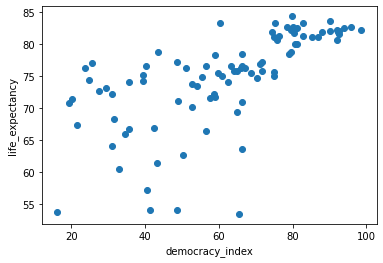

In [18]:
import matplotlib.pyplot as plt
plt.scatter(happiness_joined_df.democracy_index,happiness_joined_df.life_expectancy)
plt.xlabel('democracy_index')
plt.ylabel('life_expectancy')
plt.show()
# ,'consumer_price_index','infant_mortality_per1000_births','life_ladder','per_capita_gdp_dollars','population_density','safe_drinking_water_access_pct','seats_held_by_women_pct']]

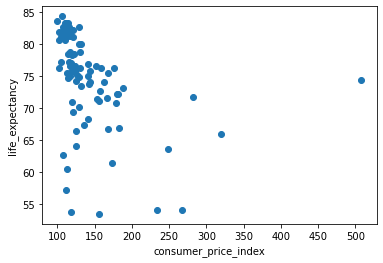

In [19]:
import matplotlib.pyplot as plt
plt.scatter(happiness_joined_df.consumer_price_index,happiness_joined_df.life_expectancy)
plt.xlabel('consumer_price_index')
plt.ylabel('life_expectancy')
plt.show()


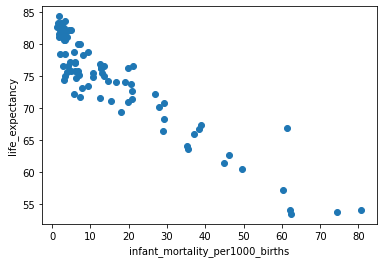

In [20]:
import matplotlib.pyplot as plt
plt.scatter(happiness_joined_df.infant_mortality_per1000_births,happiness_joined_df.life_expectancy)
plt.xlabel('infant_mortality_per1000_births')
plt.ylabel('life_expectancy')
plt.show()

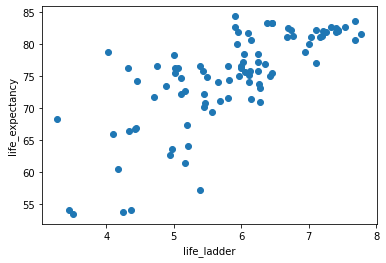

In [21]:
import matplotlib.pyplot as plt
plt.scatter(happiness_joined_df.life_ladder,happiness_joined_df.life_expectancy)
plt.xlabel('life_ladder')
plt.ylabel('life_expectancy')
plt.show()

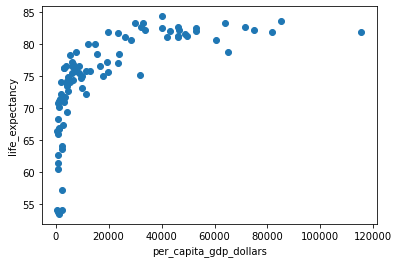

In [22]:

plt.scatter(happiness_joined_df.per_capita_gdp_dollars,happiness_joined_df.life_expectancy)
plt.xlabel('per_capita_gdp_dollars')
plt.ylabel('life_expectancy')
plt.show()

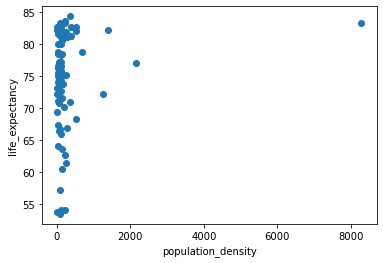

In [23]:

plt.scatter(happiness_joined_df.population_density,happiness_joined_df.life_expectancy)
plt.xlabel('population_density')
plt.ylabel('life_expectancy')
plt.show()

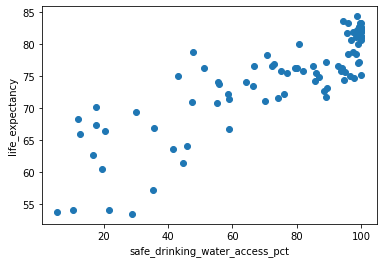

In [24]:
plt.scatter(happiness_joined_df.safe_drinking_water_access_pct,happiness_joined_df.life_expectancy)
plt.xlabel('safe_drinking_water_access_pct')
plt.ylabel('life_expectancy')
plt.show()

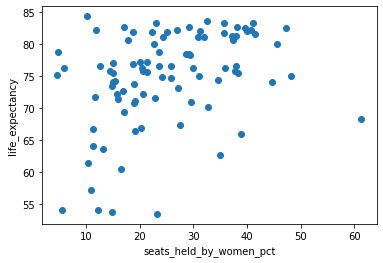

In [25]:

plt.scatter(happiness_joined_df.seats_held_by_women_pct,happiness_joined_df.life_expectancy)
plt.xlabel('seats_held_by_women_pct')
plt.ylabel('life_expectancy')
plt.show()

In [26]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[ 1.30764855e-02 -1.15912049e-02 -2.50510088e-01  3.90627794e-05
  3.78653709e-04  4.58547606e-02  7.70605155e-02 -2.12381390e-01]
74.60126006664358
